In [729]:
# General imports
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import ta

In [730]:
# Torch imports
import torch
import torch.nn as nn
import torch.optim as optim

In [731]:
"""
Download the stock data from Yahoo Finance
"""
ticker = "AAPL"

end_date = datetime.now().strftime("%Y-%m-%d")
start_date = pd.to_datetime(end_date) - pd.DateOffset(years=10)

df = yf.download(tickers=ticker, start=start_date, end=end_date).stack()

df.head()

[*********************100%***********************]  1 of 1 completed
/var/folders/zy/64gtqsbx4ts83dlyf7nwkjg00000gn/T/ipykernel_3472/654771145.py:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = yf.download(tickers=ticker, start=start_date, end=end_date).stack()


,Price,Close,High,Low,Open,Volume
Date,Ticker,,,,,
2015-01-07,AAPL,23.995316,24.095527,23.761486,23.872833,160423600
2015-01-08,AAPL,24.917263,24.975164,24.206868,24.324897,237458000
2015-01-09,AAPL,24.943993,25.220133,24.543142,25.090970,214798000
2015-01-12,AAPL,24.329361,25.082067,24.229149,25.075387,198603200
2015-01-13,AAPL,24.545374,25.119926,24.253645,24.814834,268367600


In [ ]:
import ta.momentum
import ta.trend

# Define the indicator for BB
indicator_bb = ta.volatility.BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add technical idicators to the df
df['BBMA'] = indicator_bb.bollinger_mavg()
df['BBH'] = indicator_bb.bollinger_hband()
df['BBL'] = indicator_bb.bollinger_lband()
df['EMAF'] = ta.trend.sma_indicator(df["Close"], window=50, fillna=True)
df['EMAM'] = ta.trend.sma_indicator(df["Close"], window=100, fillna=True)
df['EMAS'] = ta.trend.sma_indicator(df["Close"], window=150, fillna=True)
df['RSI'] = ta.momentum.rsi(df["Close"], fillna=True)
df['MACD'] = ta.trend.macd(df["Close"], window_slow=20, fillna=True)

# Get the target value (i.e. the next day close)
df['TargetNextClose'] = df['Close'].shift(-1)

df.head(30)

,Price,Close,High,Low,Open,Volume,BBMA,BBH,BBL,EMAF,EMAM,EMAS,RSI,MACD,TargetNextClose
Date,Ticker,,,,,,,,,,,,,,
2015-01-07,AAPL,23.995316,24.095527,23.761486,23.872833,160423600,NaN,NaN,NaN,23.995316,23.995316,23.995316,100.000000,0.000000,24.917263
2015-01-08,AAPL,24.917263,24.975164,24.206868,24.324897,237458000,NaN,NaN,NaN,24.456289,24.456289,24.456289,100.000000,0.054034,24.943993
2015-01-09,AAPL,24.943993,25.220133,24.543142,25.090970,214798000,NaN,NaN,NaN,24.618857,24.618857,24.618857,100.000000,0.096175,24.329361
2015-01-12,AAPL,24.329361,25.082067,24.229149,25.075387,198603200,NaN,NaN,NaN,24.546483,24.546483,24.546483,57.150505,0.091005,24.545374
2015-01-13,AAPL,24.545374,25.119926,24.253645,24.814834,268367600,NaN,NaN,NaN,24.546261,24.546261,24.546261,63.130046,0.098374,24.451843
2015-01-14,AAPL,24.451843,24.605501,24.162340,24.282595,195826400,NaN,NaN,NaN,24.530525,24.530525,24.530525,59.273141,0.097093,23.788202
2015-01-15,AAPL,23.788202,24.509731,23.752572,24.496370,240056000,NaN,NaN,NaN,24.424479,24.424479,24.424479,40.408768,0.055794,23.603373
2015-01-16,AAPL,23.603373,23.957457,23.427444,23.834975,314053200,NaN,NaN,NaN,24.321841,24.321841,24.321841,36.887590,0.012528,24.211330
2015-01-20,AAPL,24.211330,24.267004,23.716949,24.015358,199599600,NaN,NaN,NaN,24.309562,24.309562,24.309562,51.773738,0.014852,24.396162


In [733]:
# Clean up the df
df.dropna(inplace=True)
df.reset_index(inplace=True)
df = df.drop(columns=["Date", "Ticker", "Volume"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close            2496 non-null   float64
 1   High             2496 non-null   float64
 2   Low              2496 non-null   float64
 3   Open             2496 non-null   float64
 4   BBMA             2496 non-null   float64
 5   BBH              2496 non-null   float64
 6   BBL              2496 non-null   float64
 7   EMAF             2496 non-null   float64
 8   EMAM             2496 non-null   float64
 9   EMAS             2496 non-null   float64
 10  RSI              2496 non-null   float64
 11  MACD             2496 non-null   float64
 12  TargetNextClose  2496 non-null   float64
dtypes: float64(13)
memory usage: 253.6 KB


In [734]:
# Assign GPU if available 
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [735]:
# Extract the data set from the df
data_set = df.iloc[:, :]

data_set

Price,Close,High,Low,Open,BBMA,BBH,BBL,EMAF,EMAM,EMAS,RSI,MACD,TargetNextClose
0,26.625334,26.836894,26.346966,26.389278,25.028951,26.895678,23.162223,25.028951,25.028951,25.028951,68.662258,0.407374,26.815369
1,26.815369,26.880205,26.661103,26.833253,25.169953,27.126921,23.212986,25.114018,25.114018,25.114018,70.011280,0.435053,26.589561
2,26.589561,26.884678,26.482246,26.833255,25.253568,27.301016,23.206120,25.181088,25.181088,25.181088,66.356001,0.436635,26.766188
3,26.766188,26.793015,26.477778,26.504607,25.344678,27.488804,23.200552,25.250006,25.250006,25.250006,67.773328,0.441800,27.280403
4,27.280403,27.309469,26.864559,26.866793,25.492230,27.740212,23.244249,25.334606,25.334606,25.334606,71.533220,0.469418,27.919823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,255.589996,258.700012,253.059998,257.829987,248.524500,260.426425,236.622574,236.812848,230.600197,224.697759,67.626261,3.780857,252.199997
2492,252.199997,253.500000,250.750000,252.229996,249.267999,260.088496,238.447502,237.218951,231.028726,225.115413,60.225576,3.411204,250.419998
2493,250.419998,253.279999,249.429993,252.440002,249.809499,259.680818,239.938180,237.532516,231.404633,225.521135,56.715906,2.973906,243.850006
2494,243.850006,249.100006,241.820007,248.929993,249.869500,259.579286,240.159714,237.685114,231.685607,225.881061,46.049064,2.210497,243.360001


In [736]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
sc_data_set = sc.fit_transform(data_set)

print(sc_data_set)

[[0.02487414 0.02440389 0.02466569 ... 0.68372421 0.48302002 0.02567153]
 [0.02567153 0.02458503 0.02599042 ... 0.70308843 0.4859023  0.02472404]
 [0.02472404 0.02460374 0.02523617 ... 0.65061956 0.48606699 0.02546517]
 ...
 [0.96391452 0.9714761  0.96542006 ... 0.51224299 0.75027965 0.93634689]
 [0.93634689 0.95399377 0.9333283  ... 0.3591282  0.67078387 0.93429083]
 [0.93429083 0.93341638 0.93362346 ... 0.34929166 0.60356129 0.94117225]]


In [737]:
X = []

backcandles = 30

for j in range(len(df.columns )-1): 
    X.append([])
    for i in range(backcandles, sc_data_set.shape[0]): 
        X[j].append(sc_data_set[i-backcandles:i, j])

X = np.moveaxis(X, [0], [2])

X, yi = np.array(X), np.array(sc_data_set[backcandles:, -1])
y = np.reshape(yi, (len(yi), 1))

print(X.shape)
print(y.shape)


(2466, 30, 12)
(2466, 1)


In [738]:
def TrainTest(x, prop=0.90): 
    I = int(prop * len(x))
    train = x[:I]
    test = x[I:]
    return train, test

In [739]:
X_train, X_test = TrainTest(X)
y_train, y_test = TrainTest(y)

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([2219, 30, 12])
torch.Size([247, 30, 12])
torch.Size([2219, 1])
torch.Size([247, 1])


In [740]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate=0.1):
        super(Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_rate if num_layers > 1 else 0)
        
        # Fully connected layer for output
        self.fc = nn.Linear(hidden_size, output_size)

        # Dropout
        self.dropout = nn.Dropout(dropout_rate)
        self.batch_norm = nn.BatchNorm1d(output_size)
    
    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Pass through LSTM
        lstm_output, _ = self.lstm(x, (h0, c0))
        out = lstm_output[:, -1, :]    # Use the last timestep's output 
        
        # Fully connected layer
        out = self.fc(out)
        
        # Apply dropout and batch normalization
        # out = self.dropout(out)
        # out = self.batch_norm(out)
        return out

In [741]:
# Hyperparameters
input_size = X_train.shape[2] 
hidden_size = 128
num_layers = 3
output_size = 1
num_epochs = 2500
learning_rate = 0.0001

In [742]:
# Initialize model, loss function, and optimizer
model = Model(input_size, hidden_size, num_layers, output_size)
model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')
print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [0/2500], Loss: 0.1549
Epoch [50/2500], Loss: 0.0283
Epoch [100/2500], Loss: 0.0028
Epoch [150/2500], Loss: 0.0014
Epoch [200/2500], Loss: 0.0008
Epoch [250/2500], Loss: 0.0006
Epoch [300/2500], Loss: 0.0005
Epoch [350/2500], Loss: 0.0005
Epoch [400/2500], Loss: 0.0005
Epoch [450/2500], Loss: 0.0004
Epoch [500/2500], Loss: 0.0004
Epoch [550/2500], Loss: 0.0004
Epoch [600/2500], Loss: 0.0004
Epoch [650/2500], Loss: 0.0004
Epoch [700/2500], Loss: 0.0004
Epoch [750/2500], Loss: 0.0004
Epoch [800/2500], Loss: 0.0004
Epoch [850/2500], Loss: 0.0004
Epoch [900/2500], Loss: 0.0004
Epoch [950/2500], Loss: 0.0003
Epoch [1000/2500], Loss: 0.0004
Epoch [1050/2500], Loss: 0.0003
Epoch [1100/2500], Loss: 0.0003
Epoch [1150/2500], Loss: 0.0003
Epoch [1200/2500], Loss: 0.0003
Epoch [1250/2500], Loss: 0.0003
Epoch [1300/2500], Loss: 0.0003
Epoch [1350/2500], Loss: 0.0003
Epoch [1400/2500], Loss: 0.0003
Epoch [1450/2500], Loss: 0.0003
Epoch [1500/2500], Loss: 0.0003
Epoch [1550/2500], Loss: 0.0003

In [743]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    print(f"Test Predictions Shape: {predictions.shape}")

Test Predictions Shape: torch.Size([247, 1])


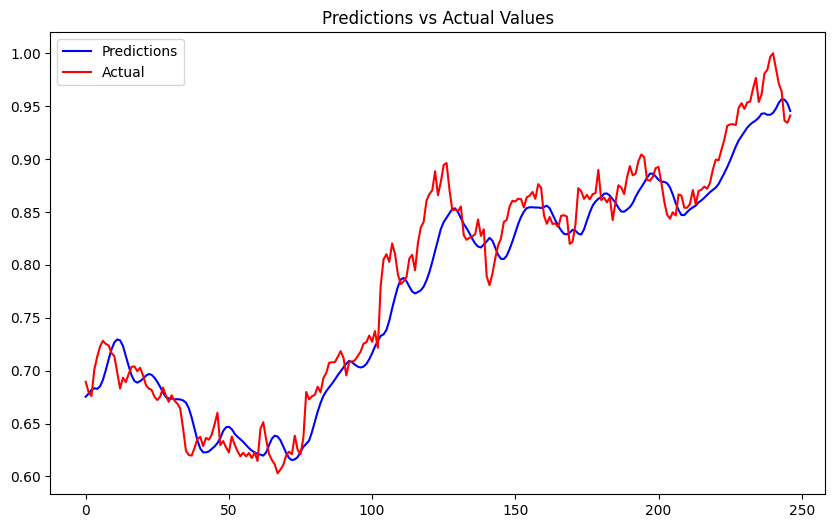

In [744]:
# Convert predictions and targets back to NumPy
predictions = predictions.numpy() # Note: Due mac not having a GPU, it will default to CPU, allowing no needed change for np
y_test = y_test.numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(predictions, label="Predictions", color="blue")
plt.plot(y_test, label="Actual", color="red")
plt.legend()
plt.title("Predictions vs Actual Values")
plt.show()